<a href="https://colab.research.google.com/github/REDFOX1899/Tensorflow_Tutorials_Practice/blob/master/FashionMNIST_1203TUE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)

1.13.1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

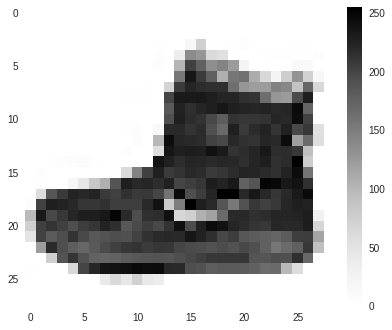

In [0]:
#inspecting the  first image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images , test_images = train_images/255.0, test_images/255.0

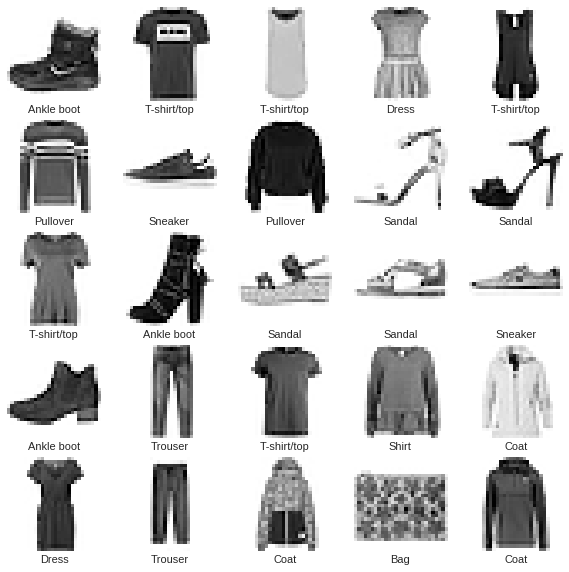

In [0]:
#inspecting the  first 25  image
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
  plt.grid(False)
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images,train_labels,epochs =5)

Epoch 1/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4974 - acc: 0.8247
Epoch 2/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3749 - acc: 0.8642
Epoch 3/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3377 - acc: 0.8765
Epoch 4/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3150 - acc: 0.8836
Epoch 5/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2973 - acc: 0.8908


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3474 - acc: 0.8743
0.8743


In [0]:
test_loss

0.34744867928028106

In [0]:
predictions = model.predict(test_images)

In [0]:
print(predictions[0].sum())

0.99999994


In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)



In [0]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

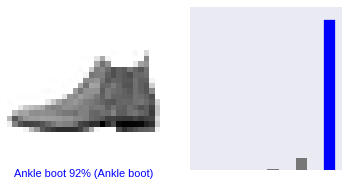

In [0]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# (nrows , ncolm, index)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

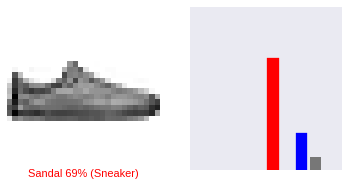

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

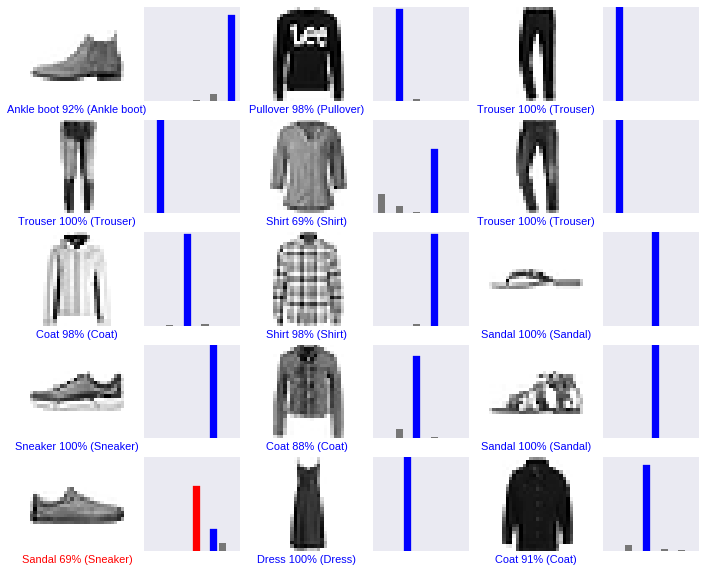

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [0]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [0]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.4189396e-06 2.5640833e-08 5.7672707e-07 5.9157298e-08 4.3169496e-07
  6.6225021e-03 1.9692084e-06 7.2617799e-02 7.0423421e-06 9.2074120e-01]]


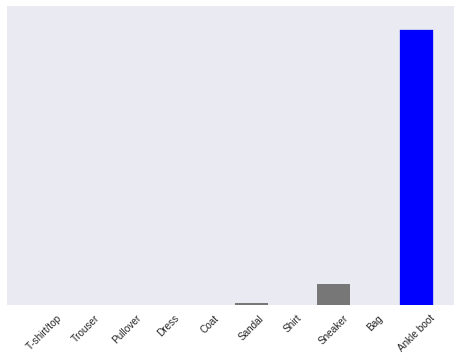

In [0]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [0]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
